##  `Exploratory Data Analysis`

- It is a way to analysis the data to understand it.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# getting the dataset

df = pd.read_csv("datasets/train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S


### `Univariate Analysis`

- Here we analyse one column at a time.

In [3]:
# differentiating numerical and categorical columns

numerical_data = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_data = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"There are {len(numerical_data)} number of numerical columns in the dataset and they are: \n{numerical_data}")
print(f"\nThere are {len(categorical_data)} number of numerical columns in the dataset and they are: \n{categorical_data}")

There are 7 number of numerical columns in the dataset and they are: 
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

There are 5 number of numerical columns in the dataset and they are: 
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### 1. Categorical columns

#### Countplot

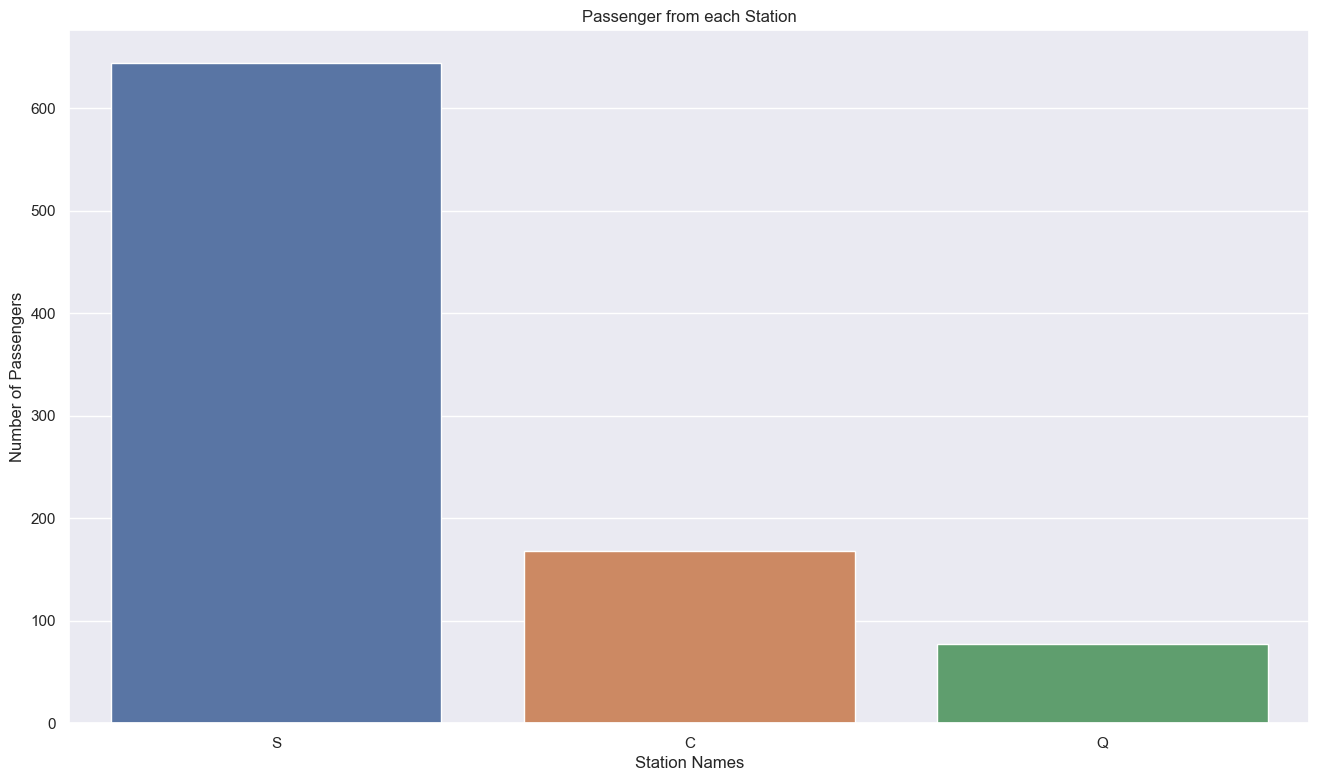

In [4]:
# To check how many passengers board the ship from each station


plt.figure(figsize=(16, 9))
sns.countplot(df['Embarked'])
plt.title("Passenger from each Station")
plt.xlabel("Station Names")
plt.ylabel("Number of Passengers")
plt.show()

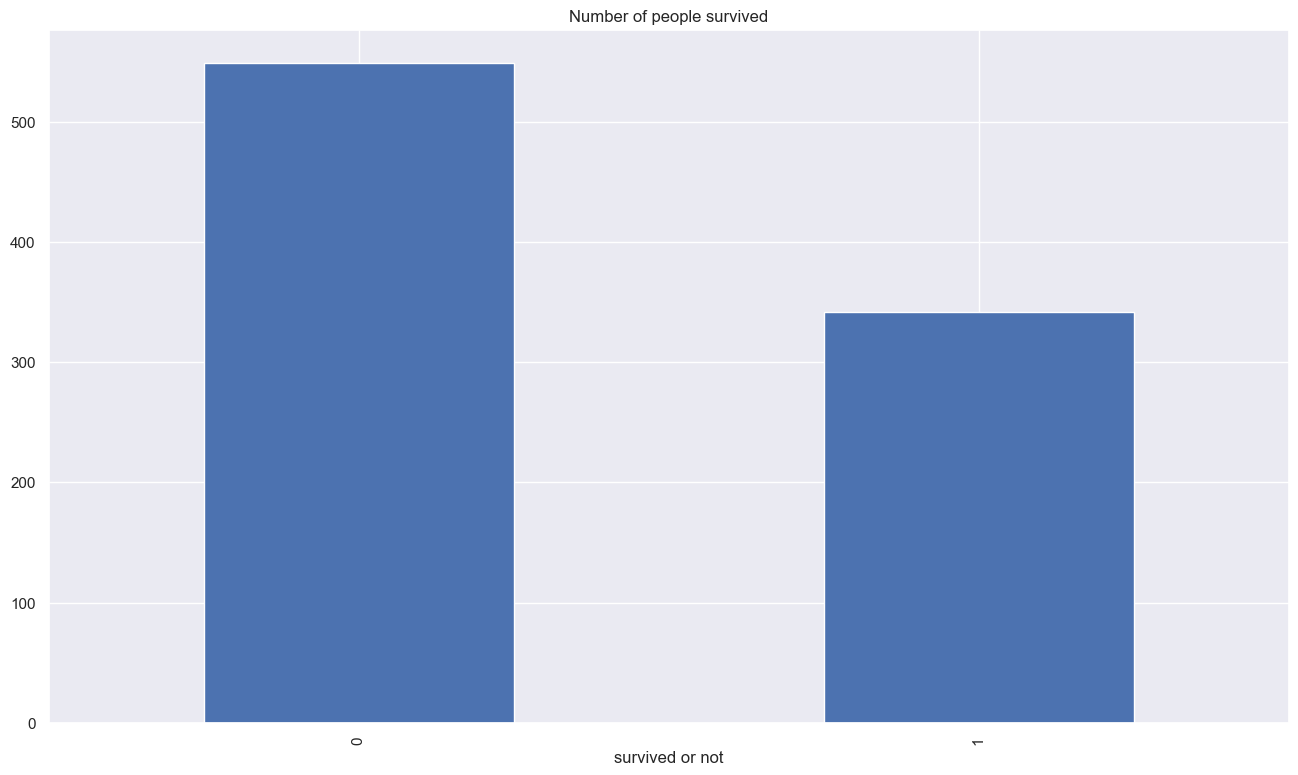

In [5]:
plt.figure(figsize=(16, 9))
df['Survived'].value_counts().plot(kind='bar')
plt.title("Number of people survived")
plt.xlabel("survived or not")
plt.show()

#### Piechart

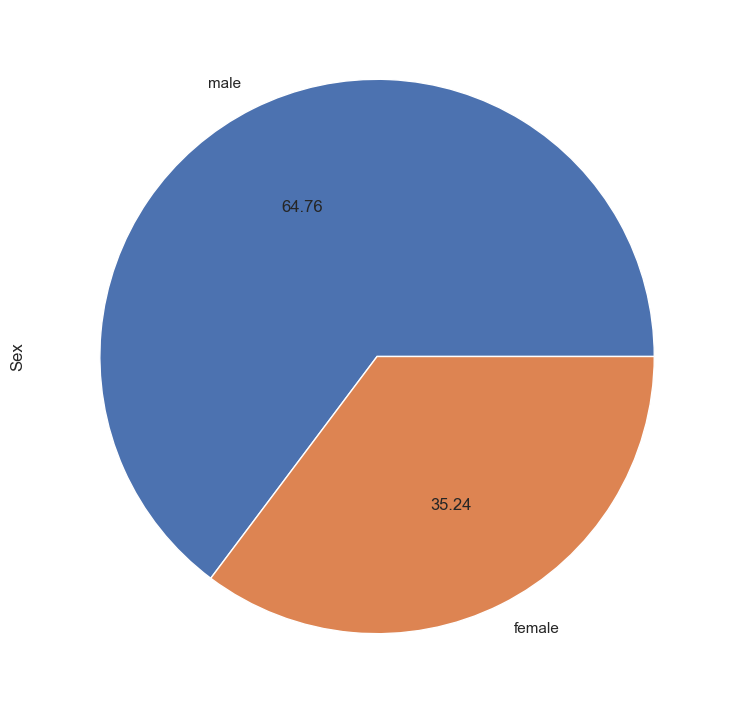

In [6]:
plt.figure(figsize=(16, 9))
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

#### 2. Numerical data

#### Histogram

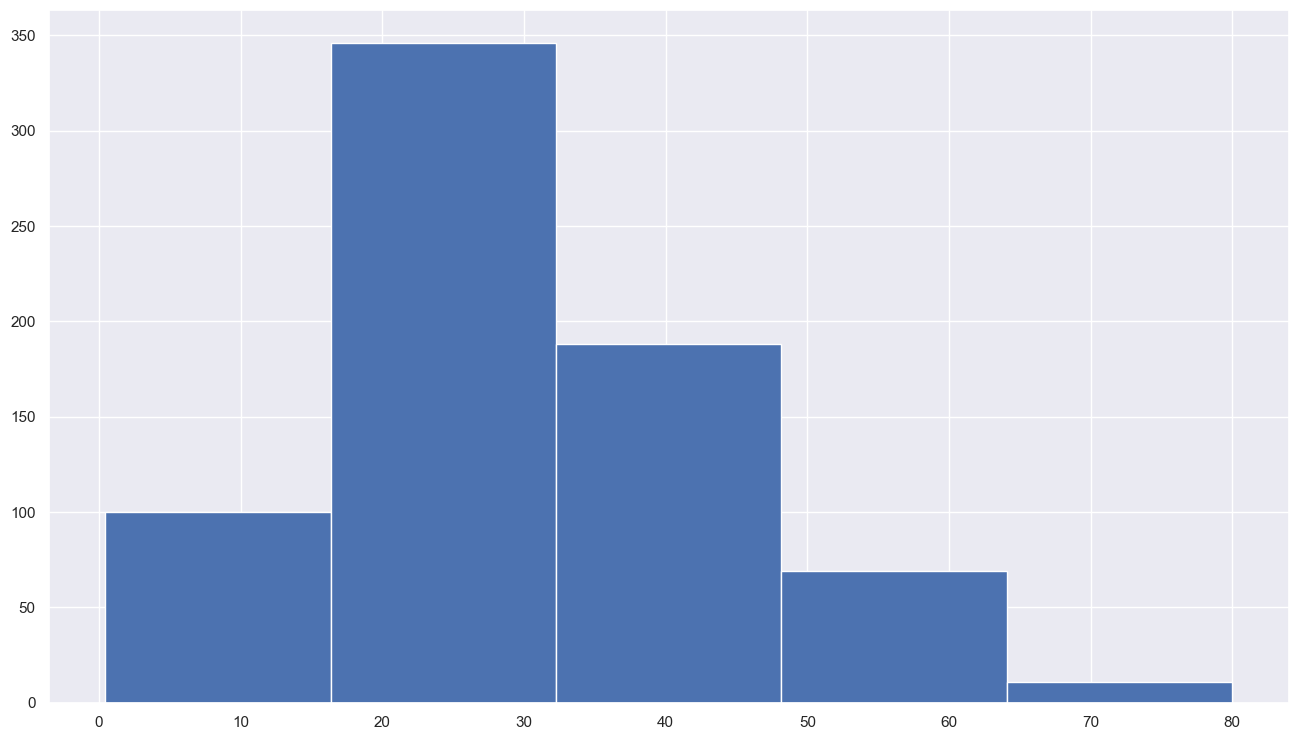

In [7]:
plt.figure(figsize=(16, 9))
plt.hist(df['Age'], bins=5)
plt.show()

#### Distplot

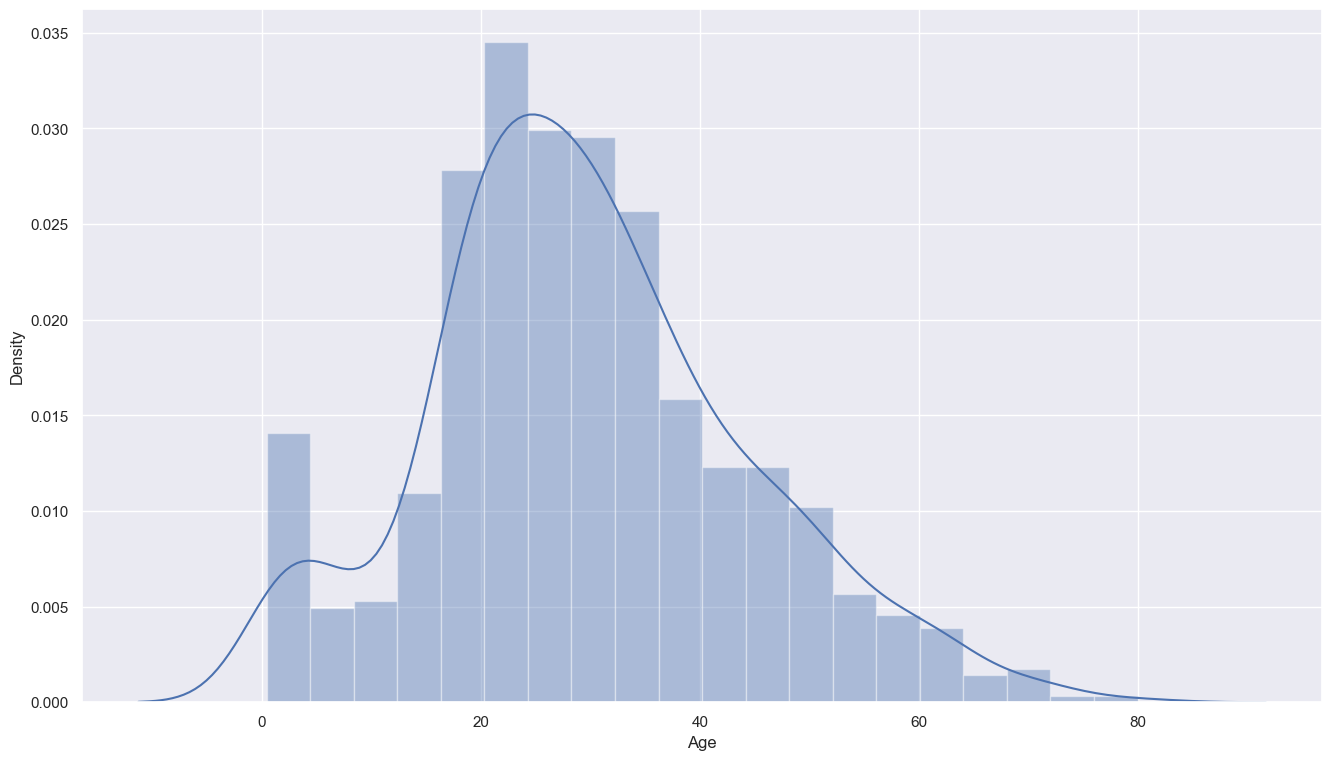

In [8]:
plt.figure(figsize=(16, 9))
sns.distplot(df['Age'])
plt.show()

#### Boxplot

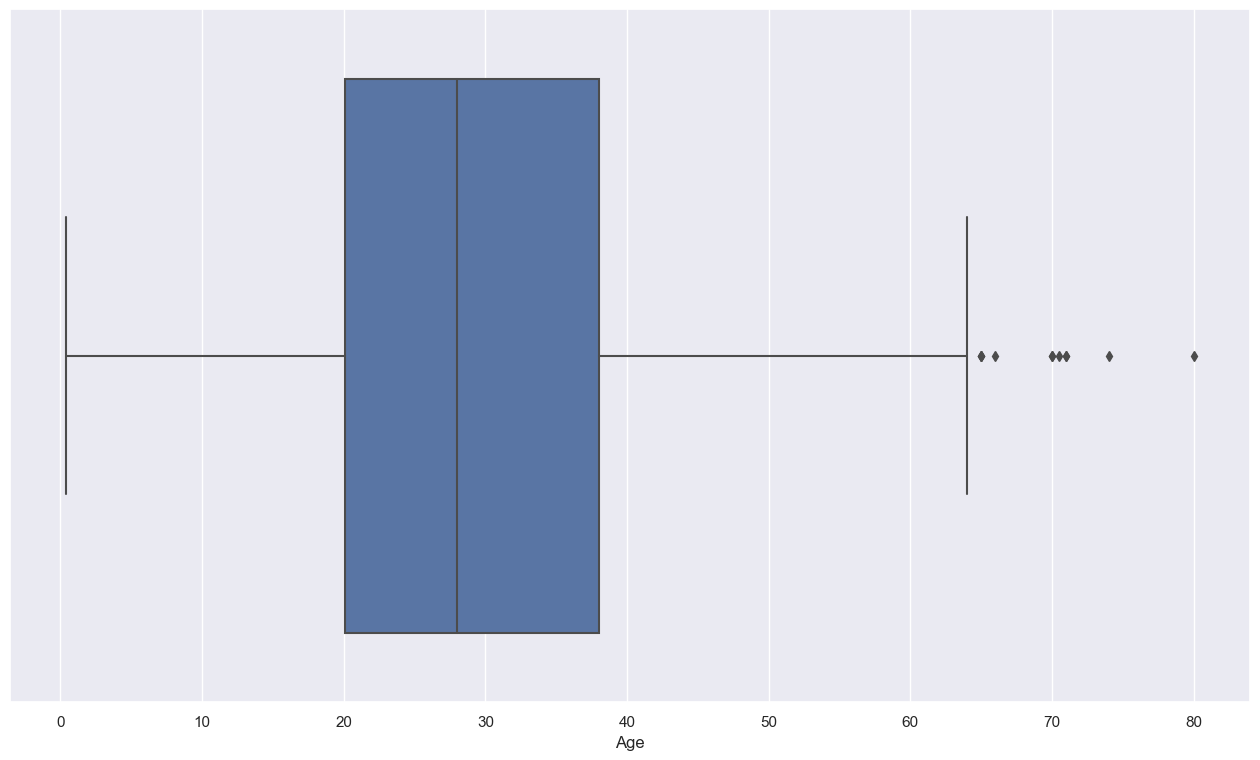

In [9]:
plt.figure(figsize=(16, 9))
sns.boxplot(df['Age'])
plt.show()

In [10]:
df["Age"].mean()

29.69911764705882

In [11]:
# 'skewness' is used to find where the data is more concentrated

df["Age"].skew()

0.38910778230082704

### `Bivariate Analysis`

**Importing different datasets**

In [12]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
titanic = df
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [15]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Scatterplot (Numerical - Numerical)

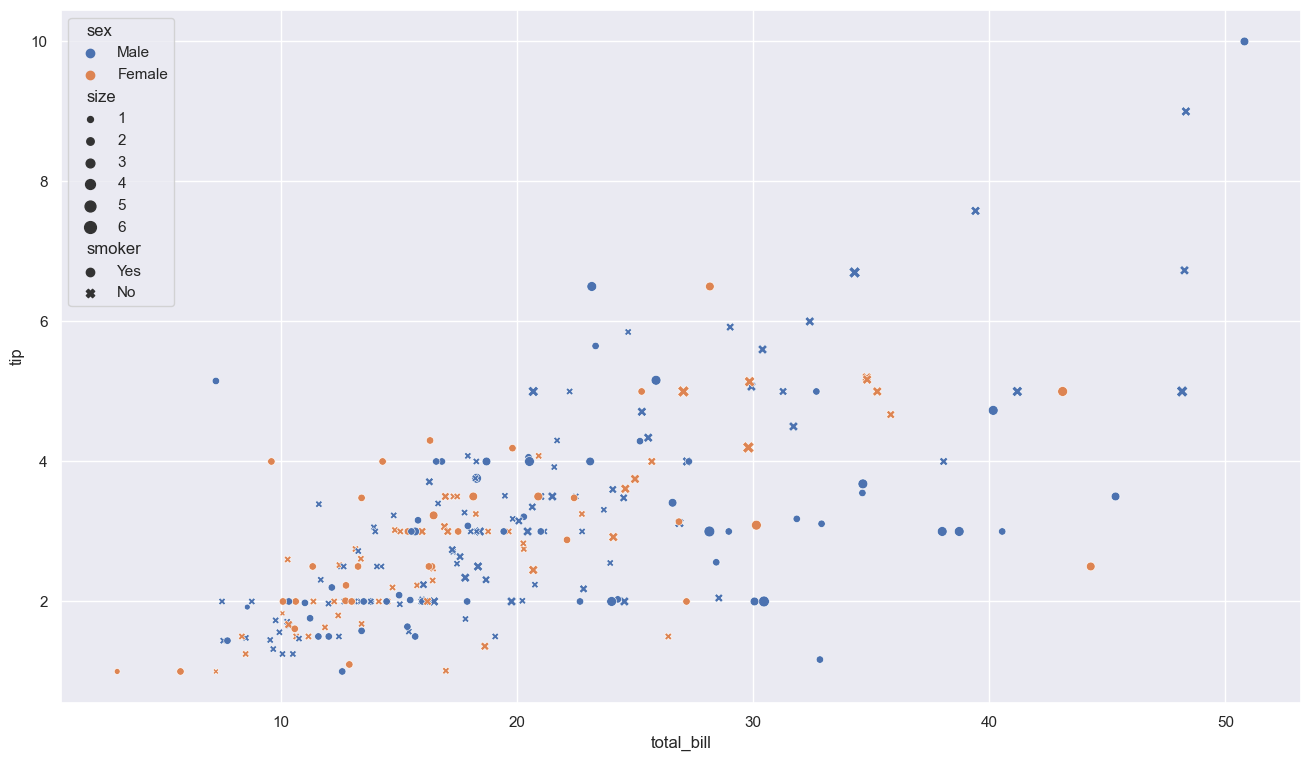

In [17]:
plt.figure(figsize=(16, 9))
sns.scatterplot(tips['total_bill'], tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])
plt.show()

#### Bar Plot (Numerical - Categorical)

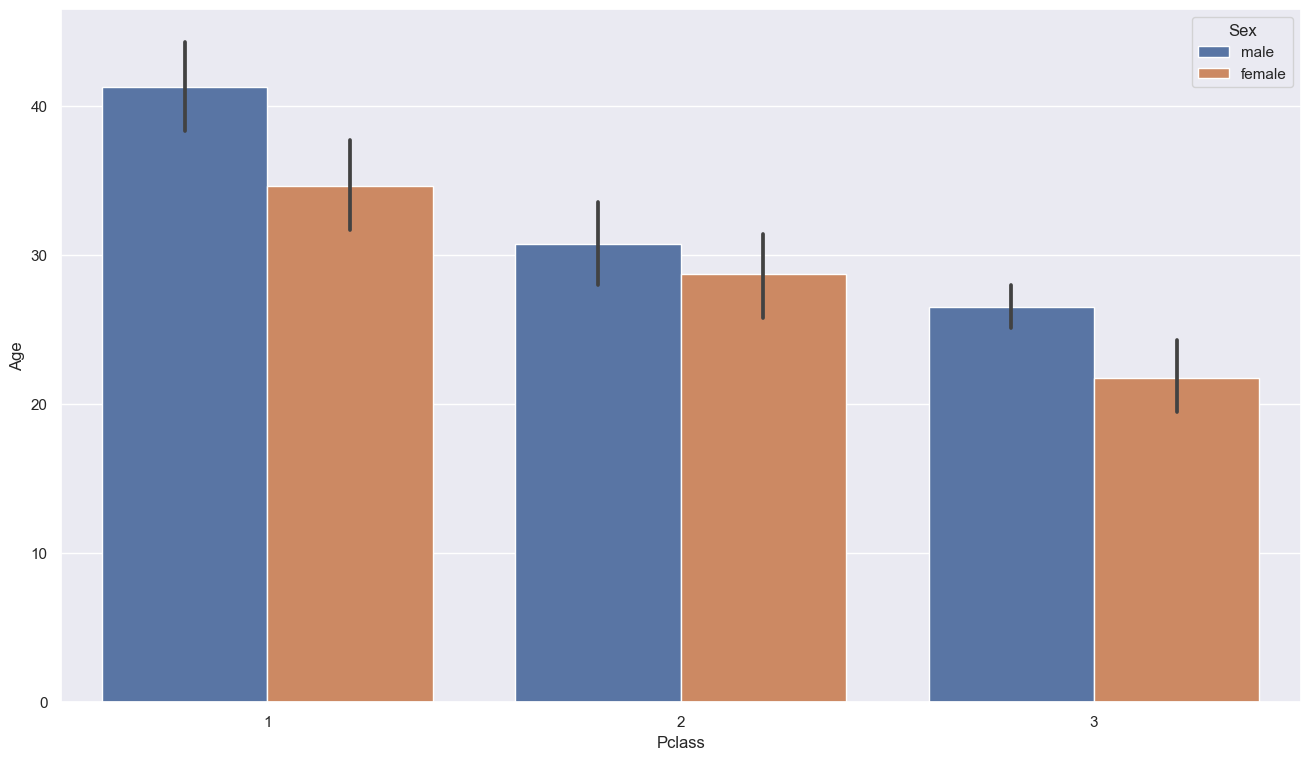

In [18]:
plt.figure(figsize=(16, 9))
sns.barplot(titanic['Pclass'], titanic['Age'], hue=titanic['Sex'])
plt.show()

#### Box Plot (Numerical - Categorical)

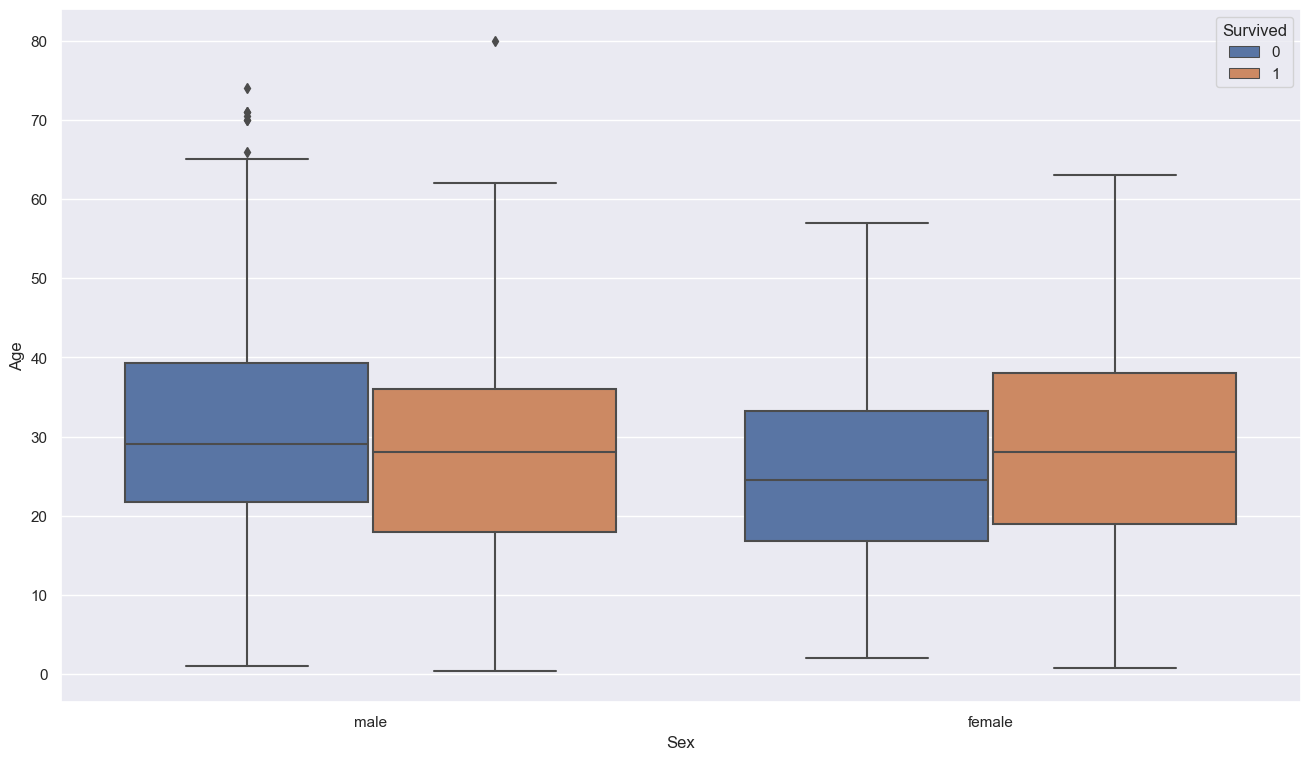

In [19]:
plt.figure(figsize=(16, 9))
sns.boxplot(titanic['Sex'], titanic['Age'], hue=titanic['Survived'])
plt.show()

#### Distplot (Numerical - Categorical)

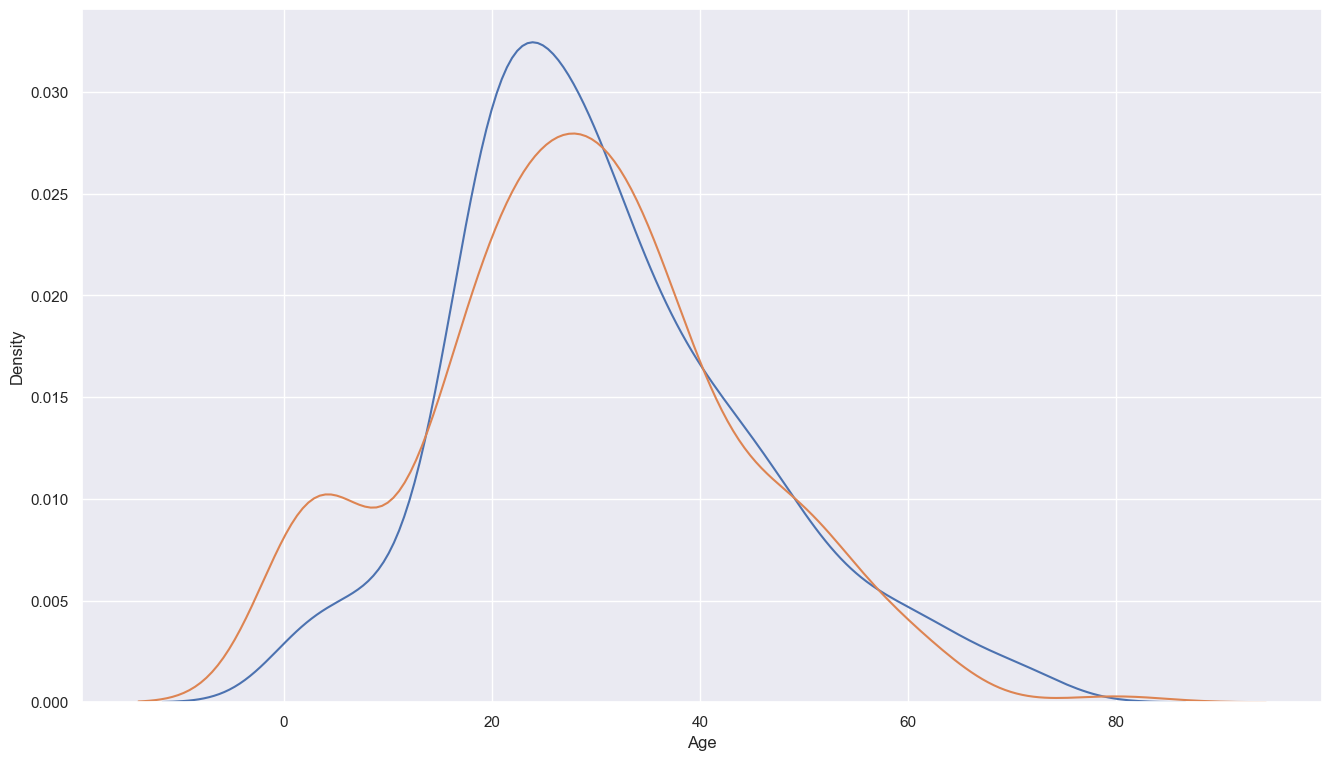

In [20]:
plt.figure(figsize=(16, 9))
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)
plt.show()

#### HeatMap (Categorical - Categorical)

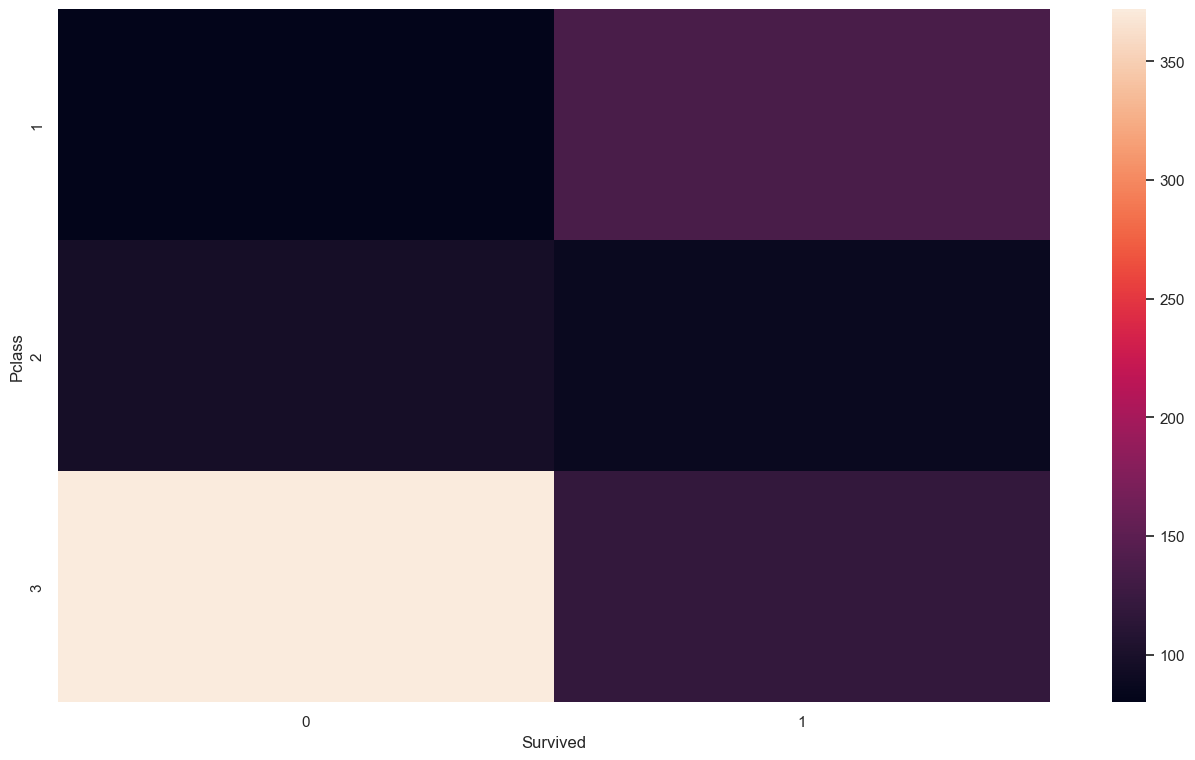

In [21]:
plt.figure(figsize=(16, 9))
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']))
plt.show()

In [22]:
# Calculating percentage of survival according to their boarding station

(titanic.groupby('Embarked').mean()['Survived']*100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

#### ClusterMap (Categorical - Categorical)

<Figure size 1600x900 with 0 Axes>

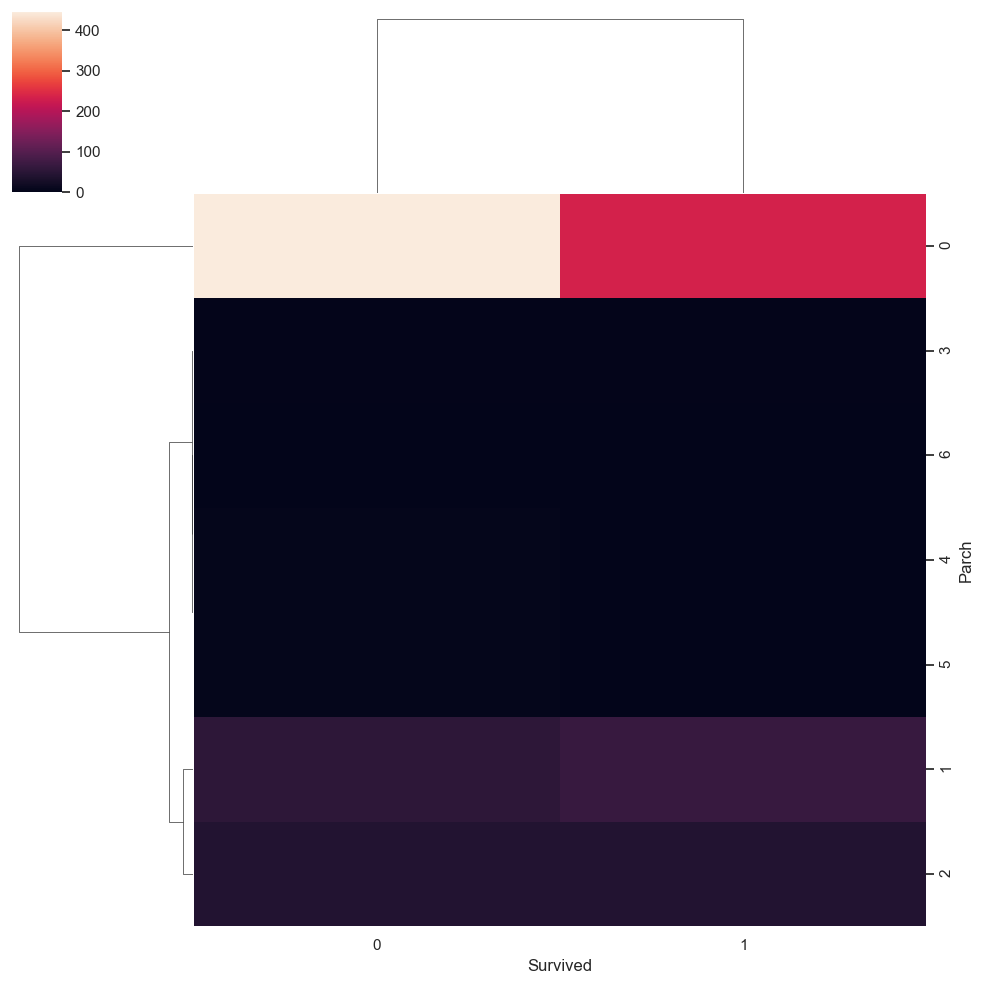

In [23]:
plt.figure(figsize=(16, 9))
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))
plt.show()

#### Pairplot

<Figure size 1600x900 with 0 Axes>

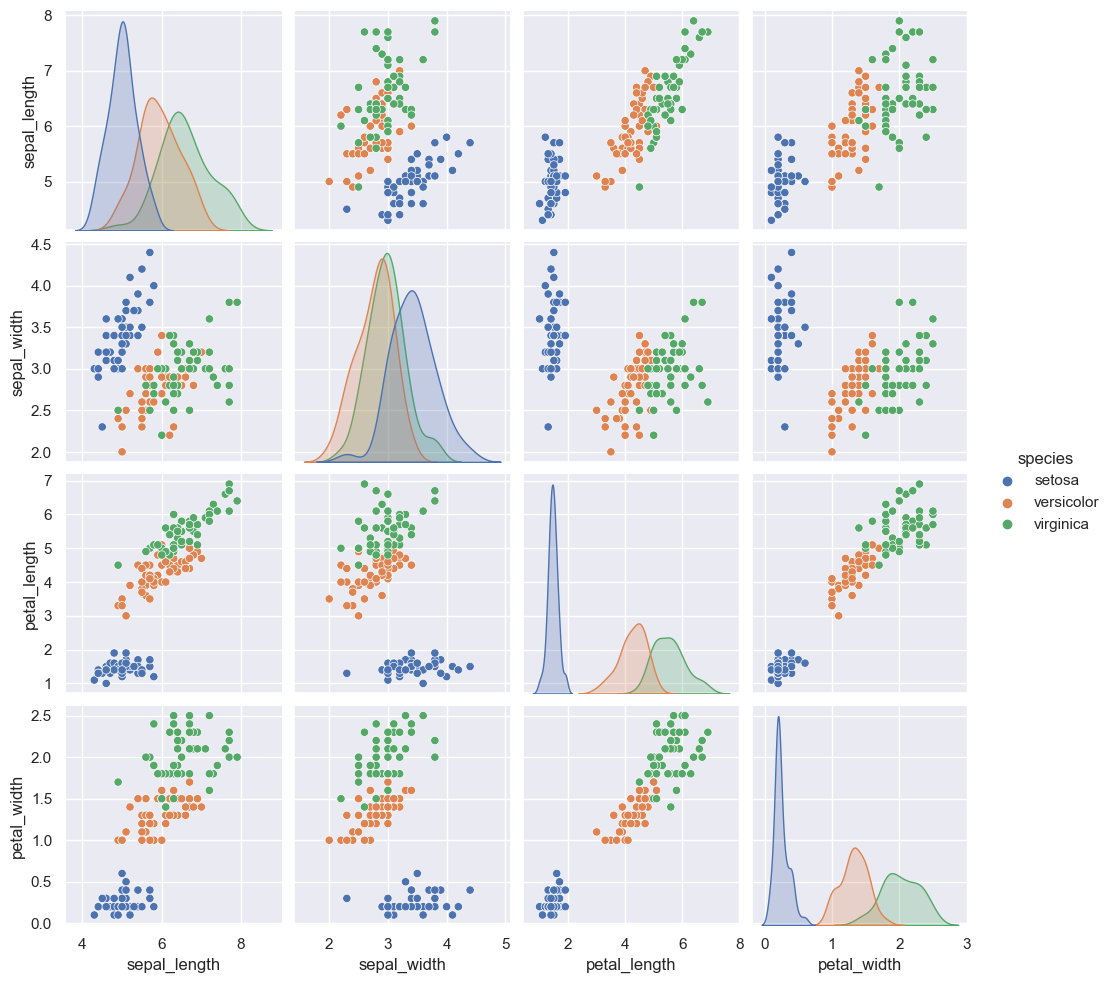

In [24]:
plt.figure(figsize=(16, 9))
sns.pairplot(iris, hue='species')
plt.show()

#### Lineplot (Numerical - Numerical)

In [25]:
# To be used when the data at the 'X-axis' is time based

new = flights.groupby('year').sum().reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


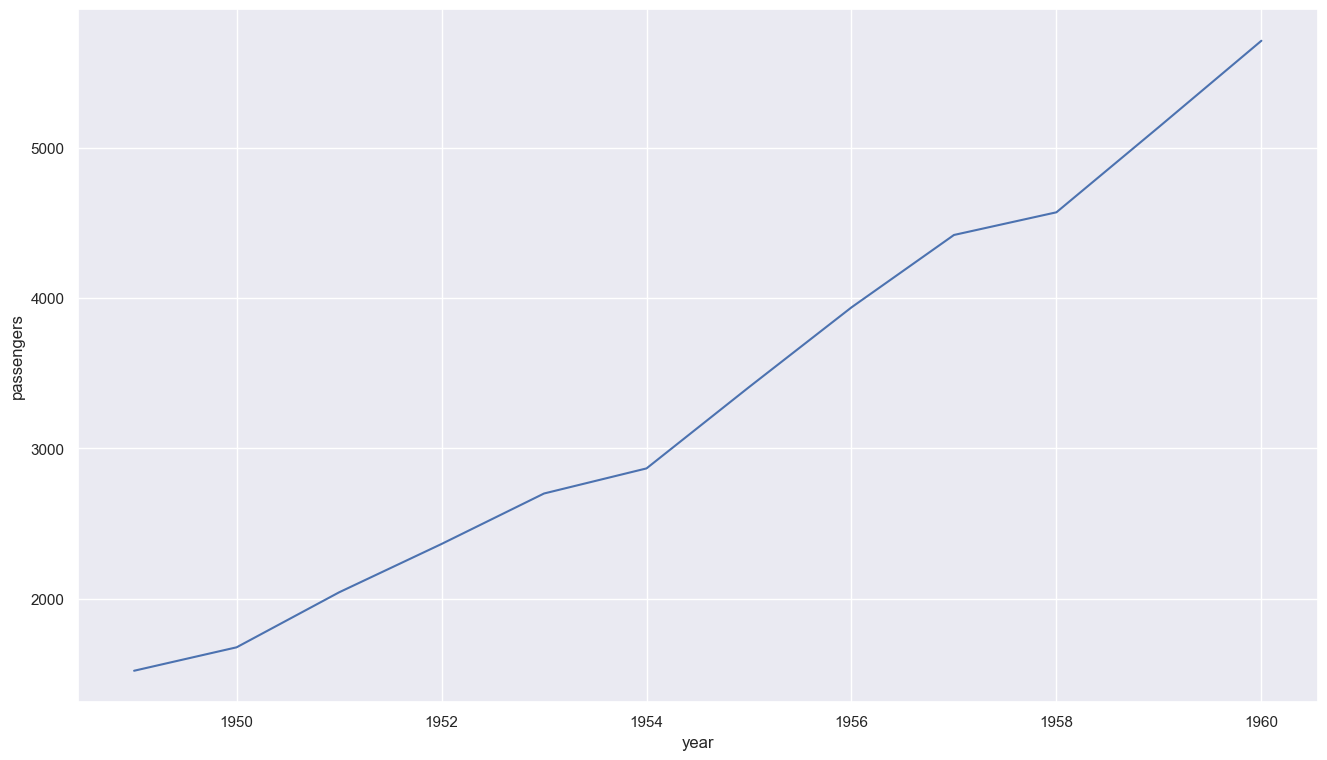

In [26]:
plt.figure(figsize=(16, 9))
sns.lineplot(new['year'], new['passengers'])
plt.show()

<Figure size 1600x900 with 0 Axes>

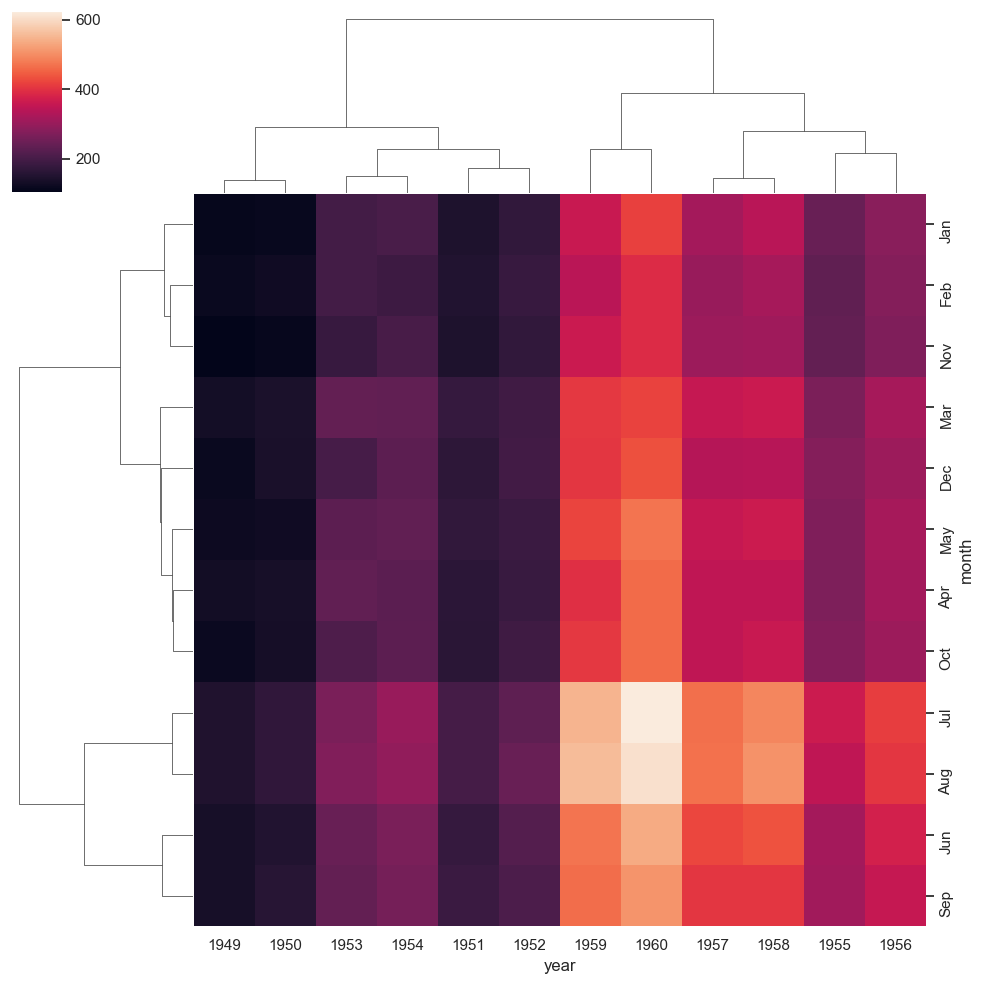

In [27]:
plt.figure(figsize=(16, 9))
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))
plt.show()